In [11]:
import pandas as pd

# Carregar o arquivo CSV
url = "https://raw.githubusercontent.com/icarocarmona/Tech-Challenges-DTAT-Grupo-26/main/F4-DATA-VIZ-PRODUCTION-MODELS/petroleo_bruto.csv"
df = pd.read_csv(url)

# Verificar as primeiras linhas do dataframe
print(df.head())

# Verificar informações sobre o dataframe
print(df.info())

# Estatísticas descritivas básicas
print(df.describe())

# Verificar se há valores nulos
print(df.isnull().sum())




         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    11164 non-null  object 
 1   Preco   11164 non-null  float64
dtypes: float64(1), object(1)
memory usage: 174.6+ KB
None
              Preco
count  11164.000000
mean      53.009718
std       33.229403
min        9.100000
25%       20.480000
50%       48.210000
75%       76.302500
max      143.950000
Data     0
Preco    0
dtype: int64


In [12]:
# Renomear a coluna
df = df.rename(columns={'Preço - petróleo bruto - Brent (FOB)': 'Preço'})

print(df.head())


         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63


Exemplos de eventos que podem ter impactado o preço do petróleo:

**Crises geopolíticas:** Guerras, conflitos, sanções comerciais em regiões produtoras de petróleo podem afetar a oferta e demanda global.

**Instabilidade política em países produtores:** Mudanças de governo, instabilidade política ou problemas de segurança podem afetar a produção e exportação de petróleo.

**Economia global:** Crises econômicas, recessões ou períodos de crescimento econômico robusto podem influenciar a demanda por petróleo.

**Decisões da OPEP:** Acordos de produção da OPEP (Organização dos Países Exportadores de Petróleo) podem ter um grande impacto no mercado global de petróleo.

In [13]:
# Converter a coluna de datas para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [14]:
df.mean()

Data     2006-08-04 07:03:12.189179392
Preco                        53.009718
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    11164 non-null  datetime64[ns]
 1   Preco   11164 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.6 KB


In [16]:
df.head()

,Data,Preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: title={'center': 'Variações Anuais do Preço do Petróleo Brent'}, xlabel='Ano'>

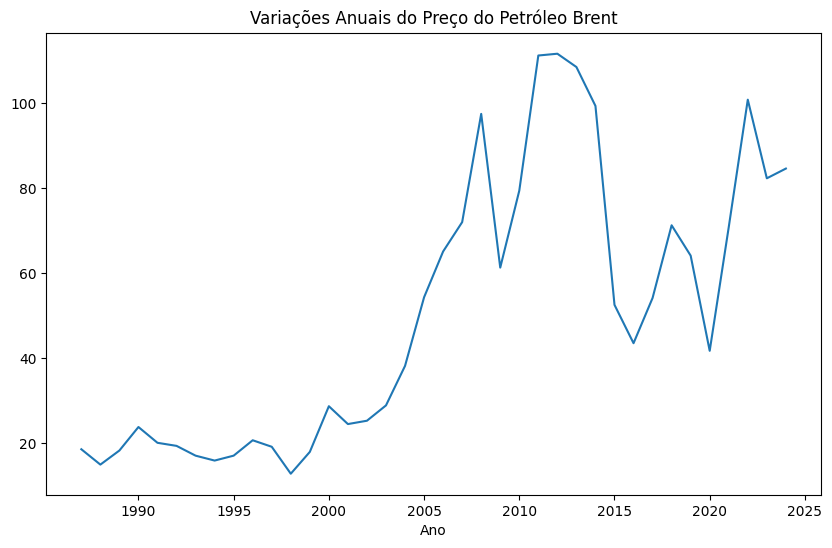

In [17]:
# Convertendo a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Extraindo o ano da coluna 'Data'
df['Ano'] = df['Data'].dt.year

# Agrupando os dados por ano e calculando a média dos preços
preco_anual = df.groupby('Ano')['Preco'].mean()

# Criando um gráfico de linha das variações anuais
preco_anual.plot(kind='line', figsize=(10, 6), title='Variações Anuais do Preço do Petróleo Brent')


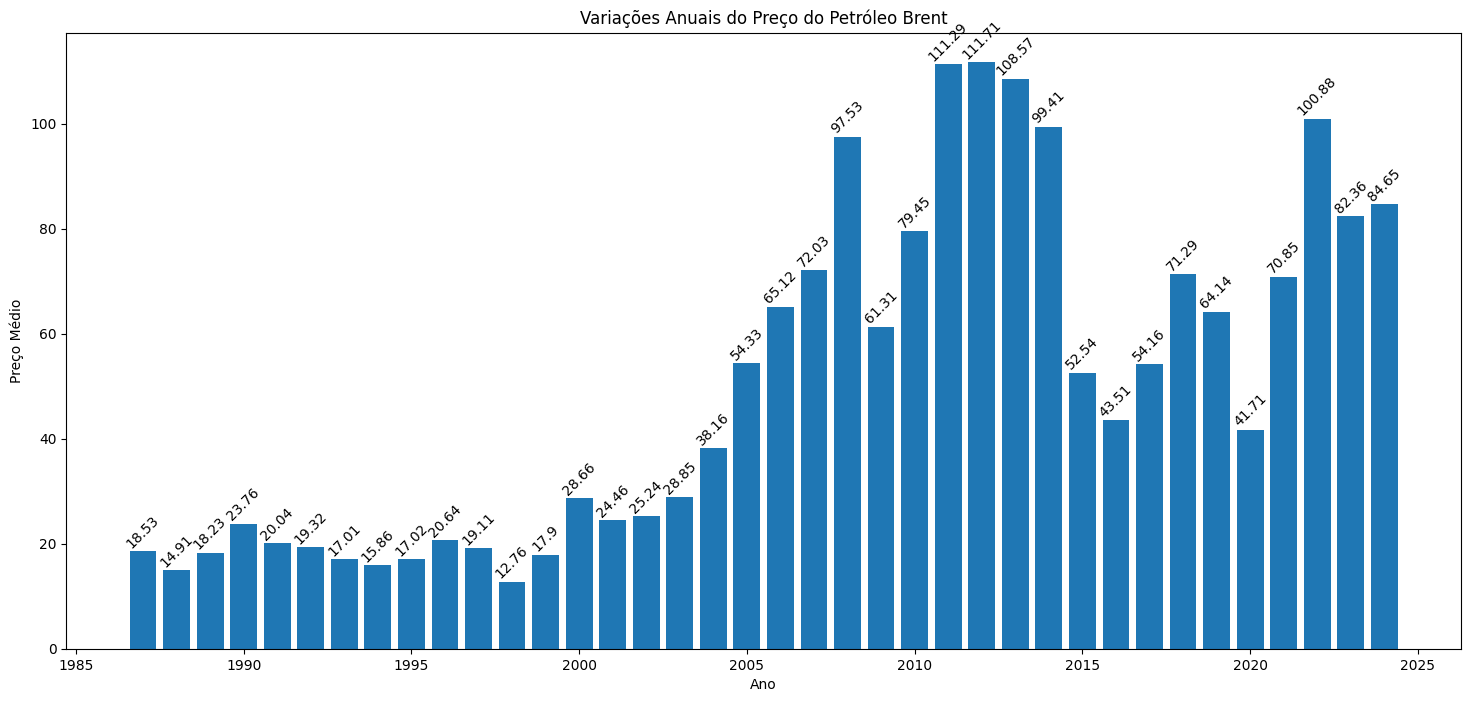

In [8]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras
plt.figure(figsize=(18, 8))
bars = plt.bar(preco_anual.index, preco_anual.values)

# Adicionando os valores das barras inclinados
for bar, value in zip(bars, preco_anual.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2), ha='center', va='bottom', rotation=45)

plt.title('Variações Anuais do Preço do Petróleo Brent')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.show()



In [9]:
df.columns

Index(['Data', 'Preco', 'Ano'], dtype='object')

In [18]:
df.head()

,Data,Preco,Ano
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987


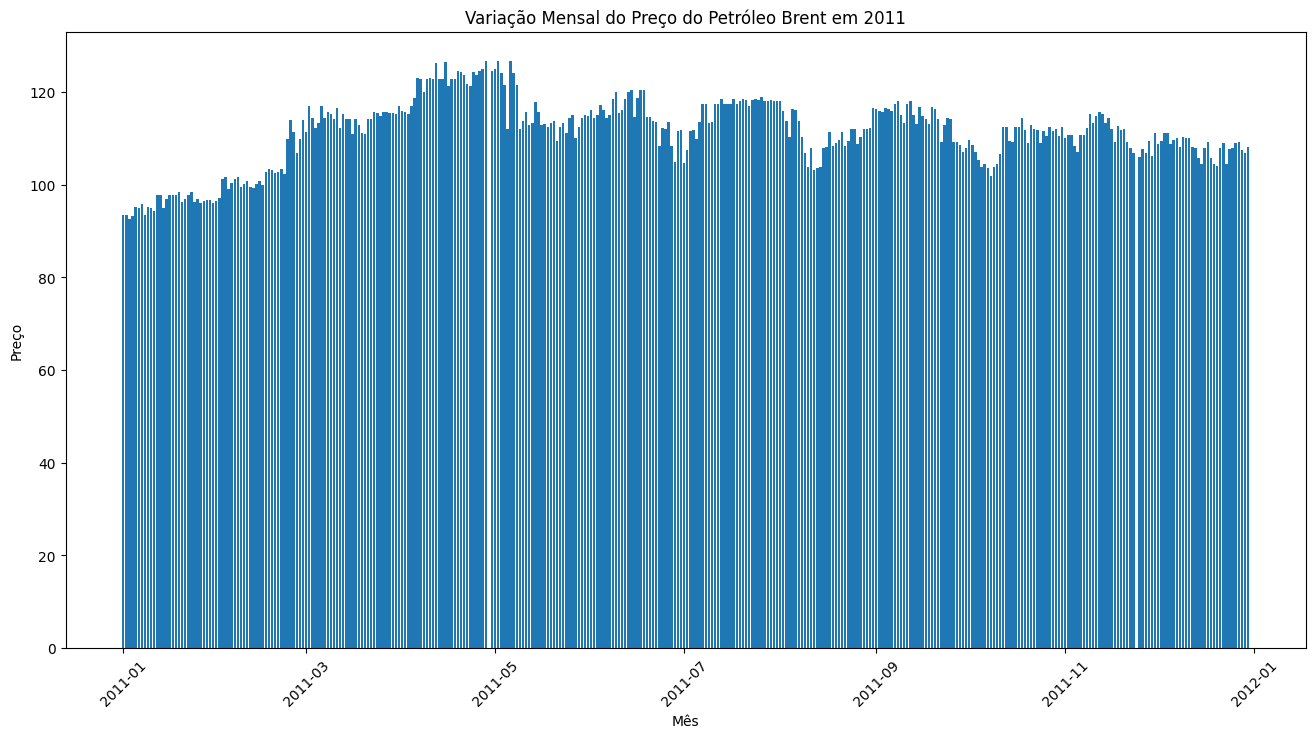

In [21]:
import matplotlib.pyplot as plt

# Filtrando os dados para incluir apenas o ano de 2011
dados_2011 = df[df['Ano'] == 2011]

# Criando o gráfico de barras com os valores mensais
plt.figure(figsize=(16, 8))
plt.bar(dados_2011['Data'], dados_2011['Preco'], width=0.8)
plt.title('Variação Mensal do Preço do Petróleo Brent em 2011')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()


<ipython-input-23-0c346f0934f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2011['Mês'] = dados_2011['Data'].dt.month


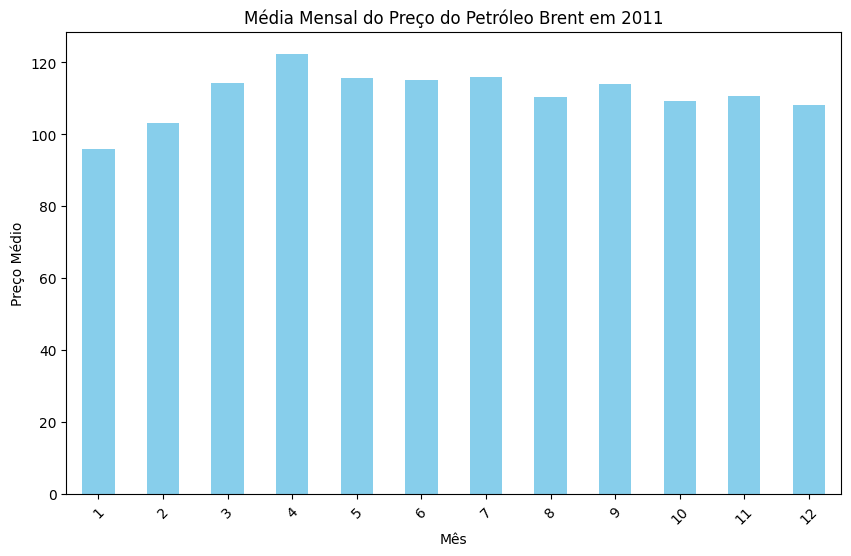

In [23]:
# Filtrando os dados para incluir apenas o ano de 2011
dados_2011 = df[df['Ano'] == 2011]

# Extraindo o mês da coluna 'Data'
dados_2011['Mês'] = dados_2011['Data'].dt.month

# Calculando a média mensal dos preços
media_mensal_2011 = dados_2011.groupby('Mês')['Preco'].mean()

# Criando o gráfico de barras com as médias mensais
plt.figure(figsize=(10, 6))
media_mensal_2011.plot(kind='bar', color='skyblue')
plt.title('Média Mensal do Preço do Petróleo Brent em 2011')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()


In [24]:
print(media_mensal_2011)


Mês
1      96.032258
2     103.148929
3     114.380000
4     122.285517
5     115.819677
6     115.005667
7     116.059032
8     110.400968
9     114.094667
10    109.333871
11    110.741379
12    108.120333
Name: Preco, dtype: float64


In [27]:
df.head()

,Data,Preco,Ano
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987


In [26]:
# Filtrando os dados para incluir apenas o ano de 2011
dados_2010 = df[df['Ano'] == 2010]

In [31]:
dados_2011

,Data,Preco,Ano,Mês
6948,2011-01-01,93.52,2011,1
6949,2011-01-02,93.52,2011,1
6950,2011-01-03,92.50,2011,1
6951,2011-01-04,93.23,2011,1
6952,2011-01-05,95.07,2011,1
...,...,...,...,...
7305,2011-12-26,108.98,2011,12
7306,2011-12-27,109.28,2011,12
7307,2011-12-28,107.54,2011,12
7308,2011-12-29,106.89,2011,12


Em 2011, o preço do petróleo Brent atingiu um máximo de 99,20 dólares por barril. O aumento foi causado por fatores como o alívio em relação às contas dos Estados Unidos, a fraqueza do dólar e as expectativas de um crescimento mais forte liderado pela China.

[Fonte de informação](https://www.terra.com.br/economia/pesquisa-preco-do-petroleo-fica-acima-de-us-90-em-2011,d09fd0d6796ea310VgnCLD200000bbcceb0aRCRD.html#:~:text=O%20petr%C3%B3leo%20Brent%20subiu%20a%20US$%2099%2C20,crescimento%20mais%20forte%20liderado%20por%20China%20e)


Em 2015, o preço do barril de petróleo Brent fechou a 31 de dezembro a 37,10 dólares, o que representa uma queda anual de 34,7% em relação ao preço de 56,82 dólares em 2014. No entanto, em maio de 2015, o barril de Brent atingiu a sua máxima do ano, a 69,63 dólares.


[Fonte de informação](https://exame.com/invest/mercados/barril-do-brent-encerra-2015-com-queda-anual-de-34-7/)